In [87]:
#Voting Classifier
#Downsampling

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("./sample_data/creditcard.csv")

In [88]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
legit_sample = resample(legit,replace=False,n_samples=len(fraud),random_state=42)
df1 = pd.concat([legit_sample, fraud], axis=0)
x = df1.drop(columns='Class', axis=1)
y = df1['Class']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
(x_train.shape, y_train.shape),(x_test.shape, y_test.shape)

(((738, 30), (738,)), ((246, 30), (246,)))

In [90]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [91]:
print(len(x_train_scaled))
print(len(x_test_scaled))

738
246


In [92]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

In [93]:
# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('Random Forest', rf_classifier),
    ('Decision Tree', dt_classifier),
    ('Logistic Regression', lr_classifier)
], voting='soft')  # Using soft voting for probabilities

In [94]:
voting_classifier.fit(x_train_scaled, y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))],
                 voting='soft')

In [95]:
voting_predictions = voting_classifier.predict(x_test_scaled)

In [96]:
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")

Voting Classifier Accuracy: 0.9472


In [97]:
class_report = classification_report(y_test, voting_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       116
           1       0.95      0.95      0.95       130

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



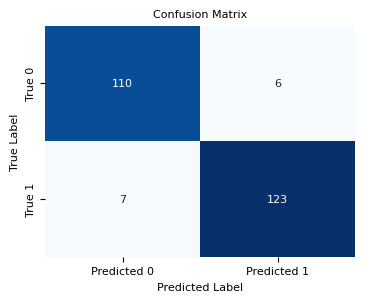

In [98]:
conf_matrix = confusion_matrix(y_test, voting_predictions)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8}, cbar=False)
plt.xlabel('Predicted Label', fontsize=8)
plt.ylabel('True Label', fontsize=8)
plt.title('Confusion Matrix', fontsize=8)
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted 0', 'Predicted 1'], fontsize=8)
plt.yticks(ticks=[0.5, 1.5], labels=['True 0', 'True 1'], fontsize=8)
plt.show()

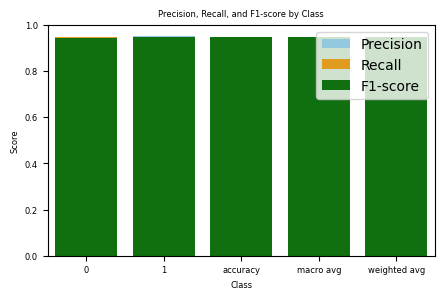

In [99]:
# Convert classification report to DataFrame
class_report_df = pd.DataFrame(classification_report(y_test, voting_predictions, output_dict=True)).T

# Plot precision, recall, and F1-score
plt.figure(figsize=(5, 3))
sns.barplot(x=class_report_df.index, y=class_report_df['precision'], color='skyblue', label='Precision')
sns.barplot(x=class_report_df.index, y=class_report_df['recall'], color='orange', label='Recall')
sns.barplot(x=class_report_df.index, y=class_report_df['f1-score'], color='green', label='F1-score')
plt.title('Precision, Recall, and F1-score by Class', fontsize=6)
plt.xlabel('Class', fontsize=6)
plt.ylabel('Score', fontsize=6)
plt.legend()
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [100]:
# Upsampling
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

fraud = resample(fraud, replace=True, n_samples=len(non_fraud), random_state=42)

In [101]:
df2=pd.concat([fraud,non_fraud])
x = df2.drop(['Time', 'Class'], axis=1)
y = df2['Class']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [103]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [104]:
print(len(x_train_scaled))
print(len(x_test_scaled))

454904
113726


In [105]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('Random Forest', rf_classifier),
    ('Decision Tree', dt_classifier),
    ('Logistic Regression', lr_classifier)
], voting='soft')  # Using soft voting for probabilities

In [106]:
voting_classifier.fit(x_train_scaled, y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))],
                 voting='soft')

In [107]:
voting_predictions = voting_classifier.predict(x_test_scaled)

In [108]:
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")

Voting Classifier Accuracy: 0.9999


In [109]:
class_report = classification_report(y_test, voting_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56980
           1       1.00      1.00      1.00     56746

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



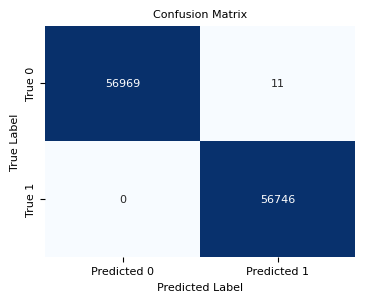

In [110]:
conf_matrix = confusion_matrix(y_test, voting_predictions)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8}, cbar=False)
plt.xlabel('Predicted Label', fontsize=8)
plt.ylabel('True Label', fontsize=8)
plt.title('Confusion Matrix', fontsize=8)
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted 0', 'Predicted 1'], fontsize=8)
plt.yticks(ticks=[0.5, 1.5], labels=['True 0', 'True 1'], fontsize=8)
plt.show()

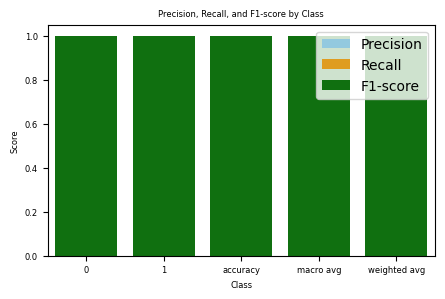

In [111]:
# Convert classification report to DataFrame
class_report_df = pd.DataFrame(classification_report(y_test, voting_predictions, output_dict=True)).T

# Plot precision, recall, and F1-score
plt.figure(figsize=(5, 3))
sns.barplot(x=class_report_df.index, y=class_report_df['precision'], color='skyblue', label='Precision')
sns.barplot(x=class_report_df.index, y=class_report_df['recall'], color='orange', label='Recall')
sns.barplot(x=class_report_df.index, y=class_report_df['f1-score'], color='green', label='F1-score')
plt.title('Precision, Recall, and F1-score by Class', fontsize=6)
plt.xlabel('Class', fontsize=6)
plt.ylabel('Score', fontsize=6)
plt.legend()
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()